In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [1]:
L = 128
d = 2
N = L**d
N_m = 16
assert N % N_m == 0, "N_m must be a divisor of N"
M = N // N_m
print(f"{L=}, {N=}, {N_m=}, {M=}")

L=128, N=16384, N_m=16, M=1024


In [3]:
# N_M=M*(M+1) evenly distributed numbers in the open interval (-1, 0)
N_M = M*(M+1)
print(f'N_M={N_M}')
k = np.arange(1, N_M+1)
print(f'k={k}')
x_k = (2*k-1)/N_M-1
print(f'x_k={x_k}')

N_M=72
k=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
x_k=[-0.98611111 -0.95833333 -0.93055556 -0.90277778 -0.875      -0.84722222
 -0.81944444 -0.79166667 -0.76388889 -0.73611111 -0.70833333 -0.68055556
 -0.65277778 -0.625      -0.59722222 -0.56944444 -0.54166667 -0.51388889
 -0.48611111 -0.45833333 -0.43055556 -0.40277778 -0.375      -0.34722222
 -0.31944444 -0.29166667 -0.26388889 -0.23611111 -0.20833333 -0.18055556
 -0.15277778 -0.125      -0.09722222 -0.06944444 -0.04166667 -0.01388889
  0.01388889  0.04166667  0.06944444  0.09722222  0.125       0.15277778
  0.18055556  0.20833333  0.23611111  0.26388889  0.29166667  0.31944444
  0.34722222  0.375       0.40277778  0.43055556  0.45833333  0.48611111
  0.51388889  0.54166667  0.56944444  0.59722222  0.625       0.65277778
  0.68055556  0.70833333  0.73611111 

In [4]:
# Generate Gaussian random numbers from the standard normal distribution
# Using the inverse error function
from scipy.special import erfinv
y_k = np.sqrt(2) * erfinv(x_k)
y_k

array([-2.46012434, -2.03683413, -1.81551733, -1.65847206, -1.53412054,
       -1.42978834, -1.33904644, -1.25816156, -1.18476314, -1.11724663,
       -1.05447245, -0.99560019, -0.93999091, -0.88714656, -0.83667055,
       -0.78824133, -0.74159404, -0.69650742, -0.65279432, -0.61029461,
       -0.56886988, -0.5283993 , -0.48877641, -0.44990661, -0.41170514,
       -0.37409541, -0.33700768, -0.30037794, -0.26414698, -0.22825958,
       -0.19266387, -0.15731068, -0.12215309, -0.08714588, -0.05224518,
       -0.01740802,  0.01740802,  0.05224518,  0.08714588,  0.12215309,
        0.15731068,  0.19266387,  0.22825958,  0.26414698,  0.30037794,
        0.33700768,  0.37409541,  0.41170514,  0.44990661,  0.48877641,
        0.5283993 ,  0.56886988,  0.61029461,  0.65279432,  0.69650742,
        0.74159404,  0.78824133,  0.83667055,  0.88714656,  0.93999091,
        0.99560019,  1.05447245,  1.11724663,  1.18476314,  1.25816156,
        1.33904644,  1.42978834,  1.53412054,  1.65847206,  1.81

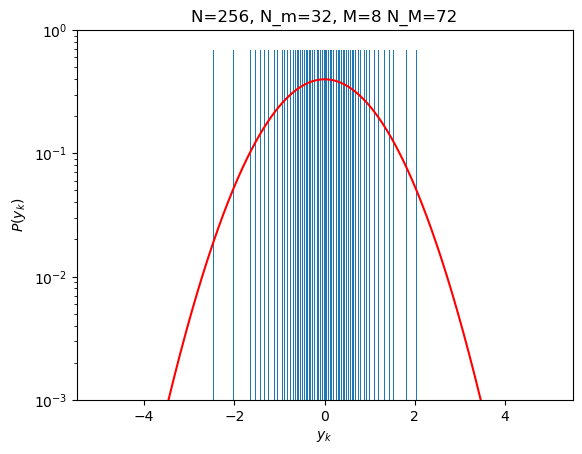

In [5]:
plt.figure()
plt.title(f'{N=}, {N_m=}, {M=} {N_M=}')
bin_width = 0.02
bins = np.arange(-5, 5, bin_width)
plt.hist(y_k, bins=bins, density=True)
y_fit = np.linspace(-5, 5, 1000)
plt.plot(y_fit, np.exp(-y_fit**2/2)/np.sqrt(2*np.pi), 'r')
plt.yscale('log')
plt.ylim(1e-3, 1)
plt.ylabel('$P(y_k)$')
plt.xlabel('$y_k$')
plt.show()

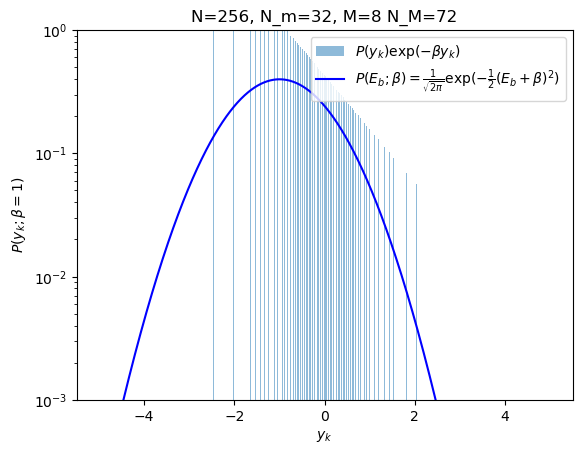

In [6]:
# Plot reweighed exp(-beta*y_k) * P(y_k)
beta = 1
plt.figure()
plt.title(f'{N=}, {N_m=}, {M=} {N_M=}')
plt.hist(y_k, bins=bins, density=True, weights=np.exp(-beta*y_k), alpha=0.5, label=r'$P(y_k)\exp(-\beta y_k)$')
y_fit = np.linspace(-5, 5, 1000)
plt.plot(y_fit, np.exp(-(y_fit+beta)**2/2)/np.sqrt(2*np.pi), 'b', label=r'$P(E_b; \beta) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2}(E_b+\beta)^2)$')
plt.yscale('log')
plt.ylim(1e-3, 1)
plt.ylabel(r'$P(y_k;\beta=1)$')
plt.xlabel('$y_k$')
plt.legend()
plt.show()

In [9]:
# Make the symmetric MxM interation matrix using the y_k values
y_k_shuffled = np.random.permutation(y_k)
I = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        I[i, j] = y_k_shuffled[i+j*M]
        I[j, i] = I[i, j]
print('done')

done


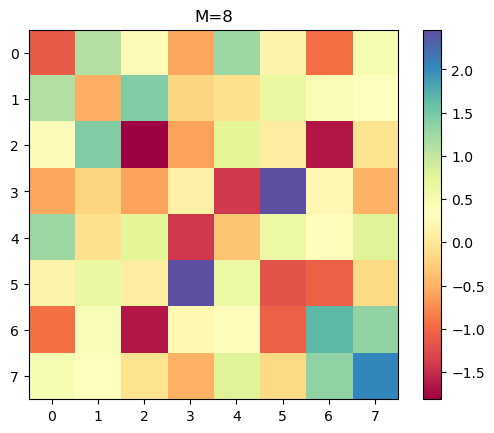

In [10]:
# Use matplotlib to plot the matrix
plt.figure()
plt.title(f'{M=}')
plt.imshow(I, cmap='Spectral')  
plt.colorbar()
plt.show()

In [11]:
def means(I):
    """ Return means of diagonal and rows as a single array """
    mu_diag = np.mean(np.diag(I)) 
    mu_rows = np.mean(I, axis=1)
    return np.concatenate(([mu_diag], mu_rows))
def sigmas(I):
    """ Return standard deviations of diagonal and rows """
    sigma_diag = np.std(np.diag(I))
    sigma_rows = np.std(I, axis=1)
    return np.concatenate(([sigma_diag], sigma_rows))
print(f'{means(I)=}')
print(f'{sigmas(I)=}')

means(I)=array([-0.14568435,  0.07758313,  0.39254163, -0.20173174, -0.05998201,
        0.23059095,  0.19639044,  0.03561572,  0.53158799])
sigmas(I)=array([1.27892238, 0.83182251, 0.6217876 , 1.04689306, 1.06693731,
       0.78716492, 1.06741051, 1.09494761, 0.78140462])


In [12]:
def deviation_measure(I):
    """ Measure of how far means are from zero, and sigmas from 1 """
    mu = means(I)
    sigma = sigmas(I)
    meassures = len(mu)+len(sigma)
    return (np.sum(np.abs(mu))**2 + np.sum(np.abs(sigma-1)**2))/meassures
print(f'{deviation_measure(I)=}')

deviation_measure(I)=0.21476323350484175


In [18]:
def swop(I, i, j, k, l):
    """ Swop two elements of the symmetric interaction matrix """
    I[i, j], I[k, l] = I[k, l], I[i, j]
    I[j, i] = I[i, j]
    I[l, k] = I[k, l]
    return I

for _ in range(10):
    i, j, k, l = np.random.randint(M, size=4)
    print((i, j), (k, l), I[i,j], I[k,l])
    I = swop(I, i, j, k, l)
    print(f'{deviation_measure(I)=}')

(5, 2) (1, 7) -0.33700767935320236 0.33700767935320236
deviation_measure(I)=0.25925866721072455
(4, 2) (7, 6) 0.7415940438615164 0.22825958147594064
deviation_measure(I)=0.2905732853543177
(0, 0) (1, 2) -1.117246627863078 -1.4297883359455208
deviation_measure(I)=0.2938168031735153
(5, 4) (0, 7) 0.6102946101863327 0.44990661476922816
deviation_measure(I)=0.28477396222623685
(2, 1) (3, 0) -1.117246627863078 1.3390464383709664
deviation_measure(I)=0.26825979826262314
(5, 4) (5, 3) 0.44990661476922816 2.4601243375600044
deviation_measure(I)=0.25586454703809736
(4, 4) (2, 6) 0.08714588195686 1.117246627863078
deviation_measure(I)=0.2042535166277469
(6, 3) (7, 7) 1.4297883359455215 2.036834131701388
deviation_measure(I)=0.2348372742785297
(7, 2) (0, 0) -0.052245180375940344 -1.4297883359455208
deviation_measure(I)=0.13738798956503076
(2, 4) (1, 4) 0.22825958147594064 -0.08714588195686
deviation_measure(I)=0.13730257274019164
